### Population model with stochastic growth rates
We consider a population model that incorporates stochastic environmental effects on the population. Starting with the logistic model $u_t = (\mu-u)u = \mu u(1-u/\mu)$ with both growth rate and carrying capacity equal to $\mu$, we let the parameter $\mu$ depend on white noise, reflecting random effects of the environment. The resulting model is of the form $u_t = (\mu-u) u + \sigma u \xi(t)$.

In [1]:
# Load modules
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

We solve the stochastic differential equation using the Euler-Maruyama method, which adapts to the forward Euler method for ordinary differential equations to stochastic differential equations.

In [2]:
# Apply Euler-Maruyama method to solve SDE
def solveSDE(mu, sigma2, x0, T, dt):
    N = int(T/dt)
    t = np.linspace(0, T, N)
    x = np.zeros(N)
    x[0] = x0
    
    for n in range(N-1):
        x[n+1] = x[n] + dt*(mu-x[n])*x[n] + np.sqrt(dt)*np.sqrt(sigma2)*x[n]*np.random.randn()
    return x, t

We simulate the stochastic differential equation $u_t = (\mu-u) u + \sigma u \xi(t)$ for small and large values of the variance parameter $\sigma$. The figure can be enlarged by picking the rectangle tool in the menu to the left of the graph and using the mouse to select a rectangle -- the notebook will enlarge the selected region.

<IPython.core.display.Javascript object>


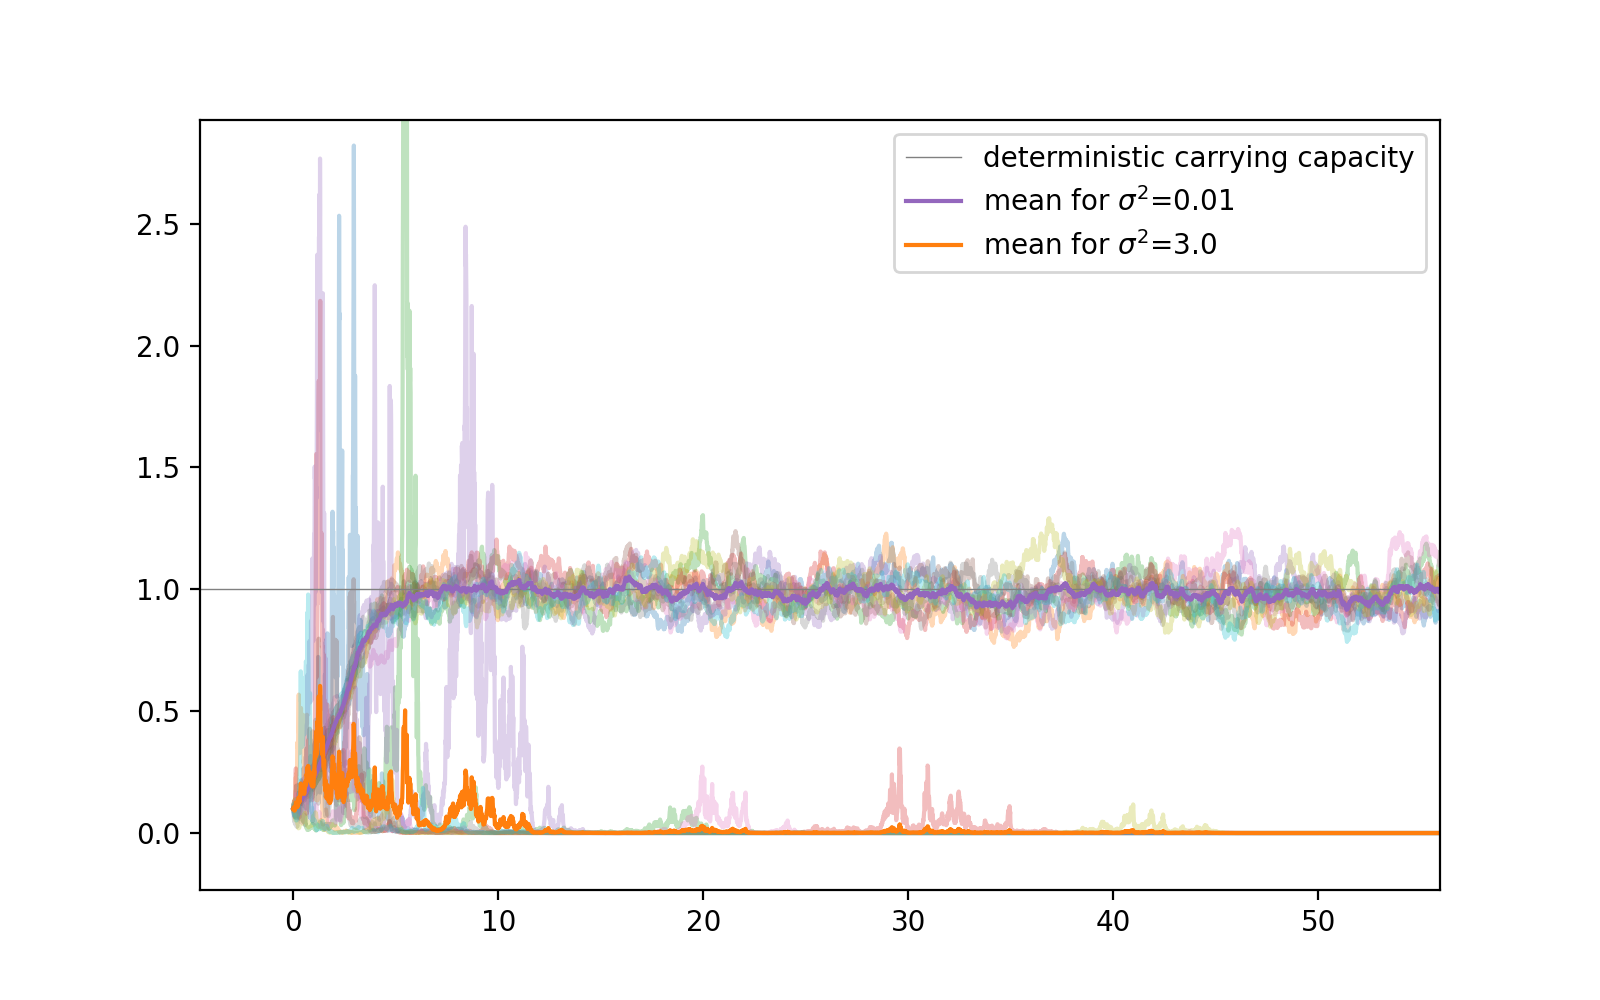

In [3]:
# Set system parameters
mu = 1.0

#Set numerical parameters
dt = 0.01  # time step
T = 100    # total time

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# Compute and plot solutions (arguments: mu, sigma^2, x0, T, dt)
mean1 = np.zeros(int(T/dt))
mean2 = np.zeros(int(T/dt))
M = 10
for m in range(M):
    sigmasq1 = 0.01
    x, t = solveSDE(mu, sigmasq1, 0.1, T, dt)
    mean1 += x
    plt.plot(t, x, alpha=0.3)
for m in range(M):
    sigmasq2 = 3.0
    x, t = solveSDE(mu, sigmasq2, 0.1, T, dt)
    mean2 += x
    plt.plot(t, x, alpha=0.3)
ax.axhline(y=mu, c='grey', linewidth=0.5, label='deterministic carrying capacity')
plt.plot(t, mean1/M, color='tab:purple', label='mean for $\sigma^2$='+str(sigmasq1))
plt.plot(t, mean2/M, color='tab:orange', label='mean for $\sigma^2$='+str(sigmasq2))
plt.legend()
plt.show()

The figure above shows that population varies near the carrying capacity $u=\mu$ for small values of $\sigma$. For large $\sigma$, the population becomes extinct! Next, we compare the probability distribution of the population with the densities predicted by the Fokker-Planck equation
$$p_t=[(x^2-\mu x)p]_x + \frac{\sigma^2}{2} [x^2p]_{xx}.$$
Its stationary solution is given by
$$p(x)=N x^{2(\mu/\sigma^2-1)} \exp(-2x/\sigma^2).$$
Here, the normalization constant $N$ given by
$$N=\frac{(\sigma^2/2)^{1-2\mu/\sigma^2}}{\Gamma(2\mu/\sigma^2-1)}$$
needs to be positive to guarantee that the graph under $p(x)$ has area one. $N$ is finite and positive only when $\sigma^2<2\mu$.

In [4]:
# Create histograms and probability density function
def computePDF(mu, sigma, x0, ntrials, T, dt):
    N = int(T/dt)
    X = x0*np.ones(ntrials)
    for n in range(N-1):
        X += dt*(mu-X)*X + np.sqrt(dt)*sigma*X*np.random.randn(ntrials)
    return X

# Probability distributions from Fokker-Planck equation
def predictedPDF(x, mu, sigmasquare):
    y = x**(2*(mu/sigmasquare-1))*np.exp(-2*x/sigmasquare)
    return y/np.sum(y)

We compare the histogram obtained from simulations with the prediction from the Fokker-Planck PDE.

<IPython.core.display.Javascript object>


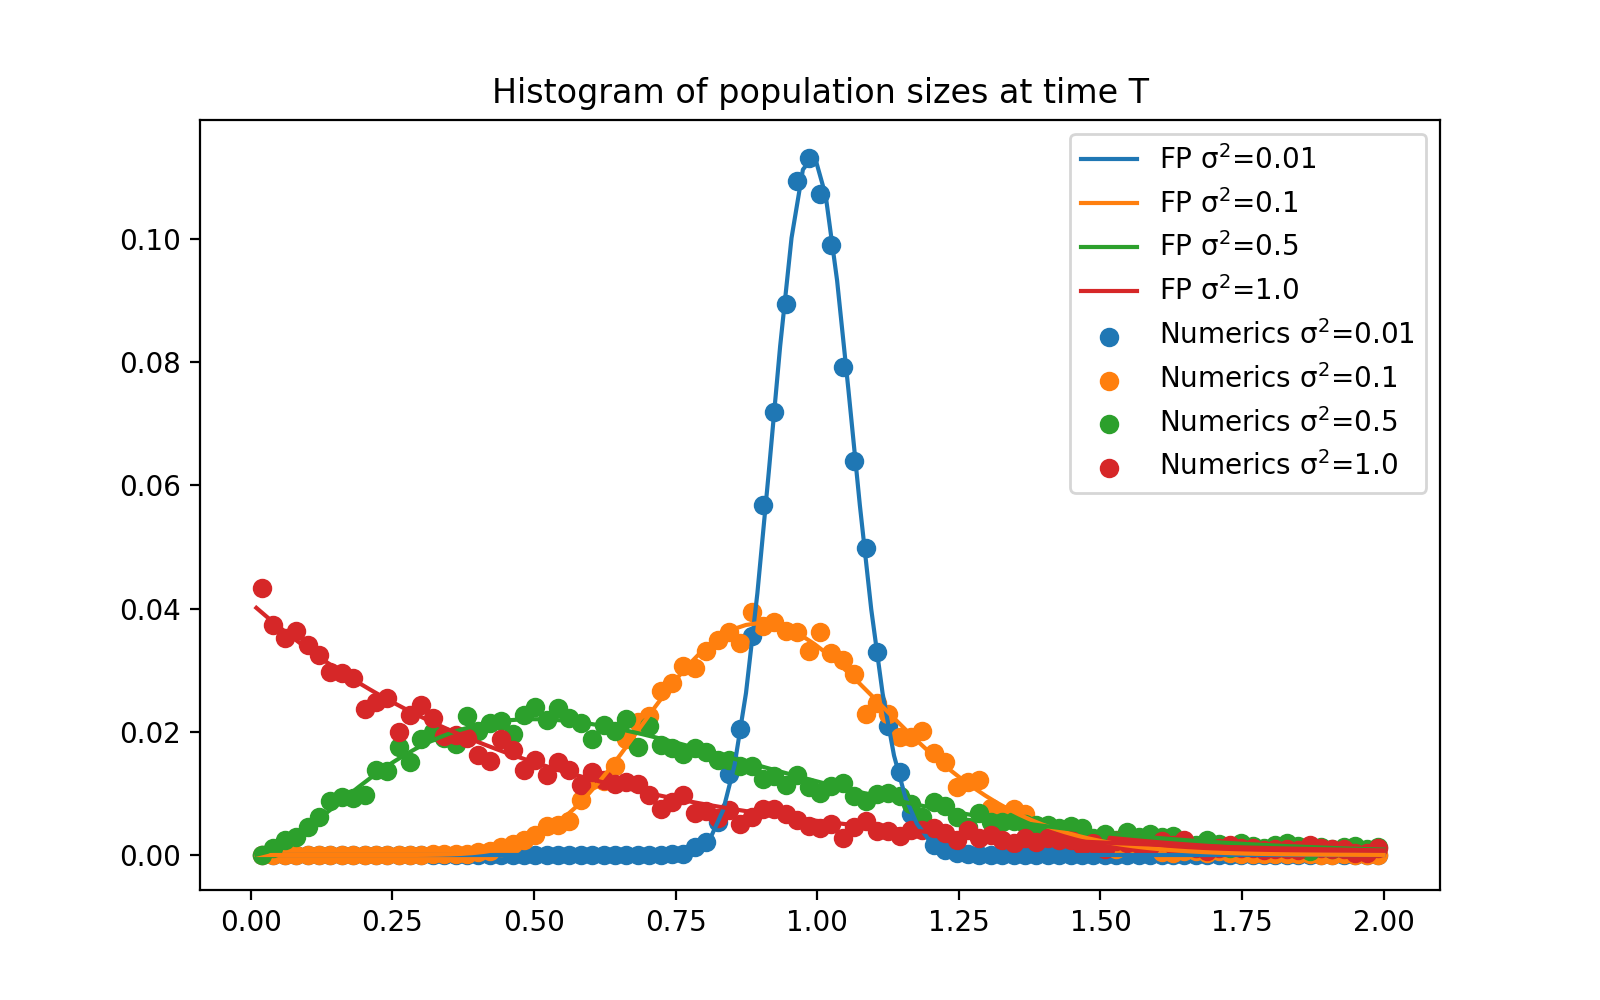

In [5]:
ntrials = 10000
bins = np.linspace(0.01, 2, 100)
sigmasquare = np.array([0.01, 0.1, 0.5, 1.0])

# Create figure
fig = plt.subplots(1, 1, figsize=(8, 5))

# Compute and plot solutions (arguments: mu, sigma, xi, T, dt)
for m in range(sigmasquare.size):
    X = computePDF(mu, np.sqrt(sigmasquare[m]), 0.1, ntrials, T, dt)
    Y = predictedPDF(bins, mu, sigmasquare[m])
    hist, _ = np.histogram(X, bins=bins)
    plt.scatter((bins[1:] + bins[:-1])/2, hist/ntrials, label='Numerics σ$^2$=' + str(sigmasquare[m]))
    plt.plot(bins, Y, label='FP σ$^2$=' + str(sigmasquare[m]))
plt.title('Histogram of population sizes at time T')
plt.legend()
plt.show()

We can see that the center of the density moves to the left towards $x=0$ as $\sigma$ is increased. For $\sigma^2>2\mu$, the population becomes extinct as the only stationary solution of the Fokker-Planck equation is the δ-function centered at $x=0$.